# How to get people to the library

image 1

![key.png](key.png)

image 2

![attendance](Attendance.png)

In [ ]:
image 3

![income](income_line.png)

In [ ]:
image 4

![image 4](visit_line.png)

image 5

![service](attend.png)

In [1]:
library(dplyr)
library(ggplot2)
library(reshape2)
library(stringr)
library(scales)
library("RColorBrewer")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.4.4"
Attaching package: 'ggplot2'

The following object is masked from 'package:dplyr':

    vars

Warning message:
"package 'reshape2' was built under R version 3.4.4"Warning message:
"package 'scales' was built under R version 3.4.4"

In [2]:
range = read.csv("Systems 92-12.csv")

In [3]:
head(range)
tail(range)

LIBID,LIBNAME,PHONE,POPU,CENTLIB,BRANLIB,BKMOB,MASTER,LIBRARIA,OTHPAID,...,VIDEO_PH,VIDEO_DL,MAT_TYPE,CBSA,MICROF,DB_LO_OT,GAL,GALMS,POSTMS,Location
40,ANCHOR POINT PUBLIC LIBRARY,9072357345,1358,1,0,0,0.00,0.25,0.00,...,NA,NA,NA,NA,,NA,,,,
50,ANCHORAGE MUNICIPAL LIBRARIES,9072612975,272262,1,4,0,34.62,34.62,73.58,...,NA,NA,NA,NA,,NA,,,,
60,ANDERSON VILLAGE LIBRARY,9075822628,649,1,0,0,0.00,0.25,0.00,...,NA,NA,NA,NA,,NA,,,,
70,ANIAK PUBLIC LIBRARY,9076754435,529,1,0,0,0.00,0.75,0.00,...,NA,NA,NA,NA,,NA,,,,
90,KUSKOKWIM CONSORTIUM LIBRARY,9075434516,4868,1,0,0,0.75,0.75,2.00,...,NA,NA,NA,NA,,NA,,,,
100,BIG LAKE LIBRARY,9078926475,3818,1,0,0,0.00,1.00,0.25,...,NA,NA,NA,NA,,NA,,,,


,LIBID,LIBNAME,PHONE,POPU,CENTLIB,BRANLIB,BKMOB,MASTER,LIBRARIA,OTHPAID,...,VIDEO_PH,VIDEO_DL,MAT_TYPE,CBSA,MICROF,DB_LO_OT,GAL,GALMS,POSTMS,Location
191614,26,NIOBRARA COUNTY LIBRARY,3073343490,NA,1,0,0,0.00,4.25,0.00,...,5608,0,NA,0,0,1,house,STD,NND,"425 S MAIN ST LUSK, WY 82225 (42.760902000000002, -104.45207499999999)"
191615,29,SUBLETTE COUNTY LIBRARY,3073674114,NA,1,1,0,2.00,2.00,13.00,...,6094,0,NA,0,0,1,house,ADV,NND,"155 S TYLER ST PINEDALE, WY 82941 (42.865096999999999, -109.86128100000001)"
191616,30,TETON COUNTY LIBRARY,3077332164,NA,1,1,0,3.85,6.50,30.15,...,7026,0,NA,27220,1,15,addresspoint,STD,NND,"125 VIRGINIAN LANE JACKSON, WY 83001 (43.471780000000003, -110.779203)"
191617,31,UINTA COUNTY LIBRARIES,3077892770,NA,1,2,0,3.00,3.00,10.00,...,9525,0,NA,21740,1,3,addresspoint,STD,NND,"701 MAIN ST EVANSTON, WY 82930 (41.265974999999997, -110.96340499999999)"
191618,32,WASHAKIE COUNTY LIBRARY,3073472231,NA,1,1,0,0.00,2.00,3.50,...,2573,0,NA,0,0,0,house,STD,NND,"1019 COBURN AVE WORLAND, WY 82401 (44.015771000000001, -107.955461)"
191619,33,WESTON COUNTY LIBRARY SYSTEM,3077462206,NA,1,1,0,0.00,4.00,2.58,...,2973,0,NA,0,0,5,house,STD,NND,"23 WEST MAIN ST NEWCASTLE, WY 82701 (43.855671000000001, -104.202302)"


In [4]:
smallrange = range %>%
select("TOTINCM", "PLSYEAR", "STABR", "ATTEND")
head(smallrange)

TOTINCM,PLSYEAR,STABR,ATTEND
9203,1992,AK,2500
7374190,1992,AK,1000721
14887,1992,AK,2266
17631,1992,AK,3000
263549,1992,AK,32000
94262,1992,AK,14496


In [5]:
barchart <- smallrange %>%
group_by(PLSYEAR) %>%
mutate(income = as.numeric(TOTINCM)) %>%
summarize(totals = sum(income)) %>%
filter(PLSYEAR > 0)

head(barchart)

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

PLSYEAR,totals
1992,5011103695
1993,5086093021
1994,5282169336
1995,5593971417
1996,5904967392
1997,6267754375


Warning message:
"Removed 13 rows containing missing values (geom_path)."

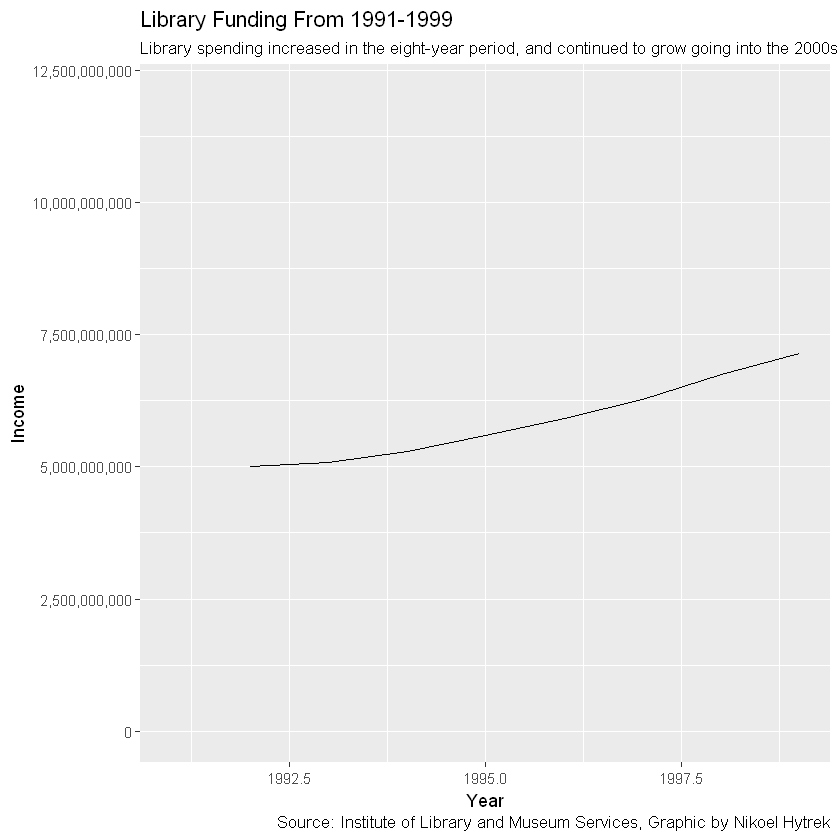

In [6]:
ggplot(barchart, aes(x=PLSYEAR, y=totals)) + geom_line() + scale_x_continuous(limits = c(1991, 1999)) + 
scale_y_continuous(limits = c(0,12000000000), labels=comma) + labs(x="Year", y="Income", title="Library Funding From 1991-1999",
                                                                  subtitle="Library spending increased in the eight-year period, and continued to grow going into the 2000s",
                                                                  caption="Source: Institute of Library and Museum Services, Graphic by Nikoel Hytrek")

In [7]:
ggsave("income_line.pdf", width=9, height=4)

Warning message:
"Removed 13 rows containing missing values (geom_path)."

In [8]:
nextchart <- smallrange %>%
group_by(PLSYEAR) %>%
summarize(totals = sum(ATTEND)) %>%
filter(PLSYEAR > 0)

head(nextchart)

PLSYEAR,totals
1992,932349435
1993,961791956
1994,961267587
1995,981506189
1996,1013798116
1997,1057940043


Warning message:
"Removed 15 rows containing missing values (geom_path)."

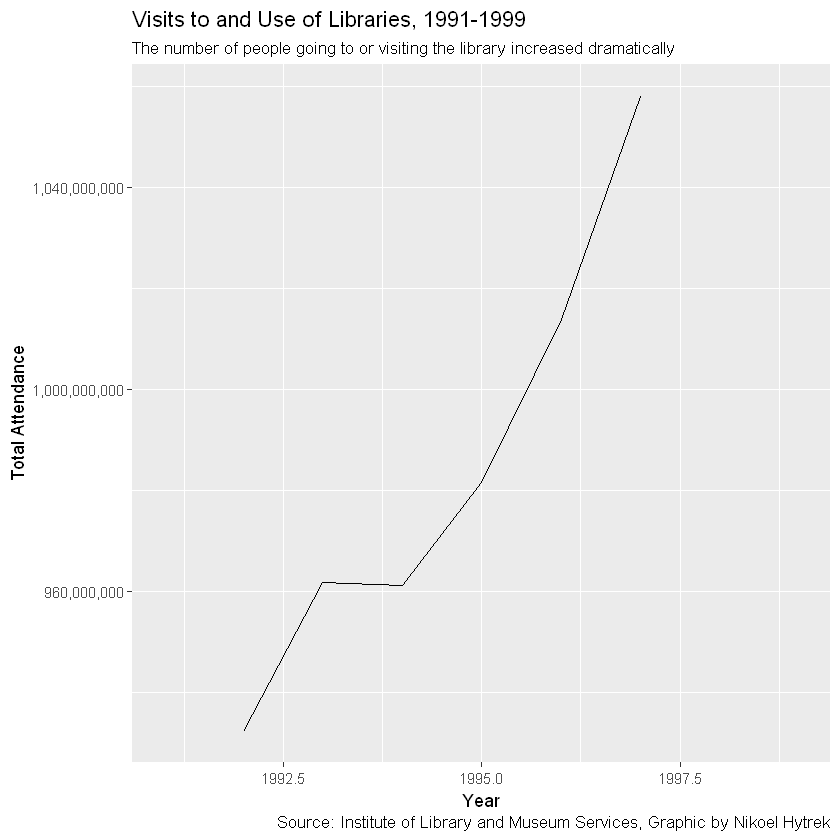

In [10]:
ggplot(nextchart, aes(x=PLSYEAR, y=totals)) + geom_line() + scale_x_continuous(limits = c(1991, 1999))+ 
scale_y_continuous(labels=comma) + labs(x="Year", y="Total Attendance", title="Visits to and Use of Libraries, 1991-1999", 
                                       subtitle="The number of people going to or visiting the library increased dramatically", 
                                       caption="Source: Institute of Library and Museum Services, Graphic by Nikoel Hytrek")

In [11]:
ggsave("visit_line.pdf", width=9, height=4)

Warning message:
"Removed 15 rows containing missing values (geom_path)."

In [12]:
recent = read.csv("States 2015.csv")

In [13]:
head(recent)
tail(recent)

STATE,SERVICE.AREA.POPULATION,UNDUPLICATED.POPULATION,STATE.POPULATION,CENTRAL.LIBRARIES,BRANCH.LIBRARIES,BOOKMOBILES,MLS.LIBRARIAN.STAFF,LIBRARIAN.STAFF,OTHER.STAFF,...,PROGRAM.AUDIENCE,KIDS.PROGRAM.AUDIENCE,YA.PROGRAM.AUDIENCE,COMPUTERS,COMPUTER.USES,WIFI.SESSIONS,START.DATE,END.DATE,YEAR,BEA.REGION
AK,654479,647583,737625,86,16,1,58.86,118.31,193.09,...,254172,177102,21401,1069,749206,730747,14-Jan,15-Jun,2016,8
AL,4833722,4833722,4833722,222,74,16,328.08,730.76,988.72,...,1121601,723637,93665,5556,4277108,3703127,14-Oct,15-Sep,2016,5
AR,2833849,2643928,2915918,54,179,2,145.11,282.61,723.28,...,1050483,738691,103945,2718,1858903,1150709,15-Jan,15-Dec,2016,5
AS,60863,60324,60863,1,1,0,1.00,7.00,3.00,...,6846,6684,12,20,7118,2420,14-Oct,15-Sep,2016,9
AZ,10652448,6758251,6758251,85,136,11,473.98,560.61,1492.25,...,1526227,1064657,100069,7630,7150328,5340816,14-Jul,15-Jun,2016,6
CA,38697702,38697702,38714725,166,949,51,3080.26,3268.83,8510.39,...,9428715,7051832,553731,22251,32275277,15496024,14-Jul,15-Jun,2016,8


,STATE,SERVICE.AREA.POPULATION,UNDUPLICATED.POPULATION,STATE.POPULATION,CENTRAL.LIBRARIES,BRANCH.LIBRARIES,BOOKMOBILES,MLS.LIBRARIAN.STAFF,LIBRARIAN.STAFF,OTHER.STAFF,...,PROGRAM.AUDIENCE,KIDS.PROGRAM.AUDIENCE,YA.PROGRAM.AUDIENCE,COMPUTERS,COMPUTER.USES,WIFI.SESSIONS,START.DATE,END.DATE,YEAR,BEA.REGION
48,VA,8164556,8164556,8382993,83,274,22,897.74,996.93,2747.43,...,2562861,1727384,139964,7084,6963547,7398797,14-Jul,15-Jun,2016,5
49,VT,686918,605296,626630,183,3,4,67.21,217.73,137.92,...,399967,269004,18650,1110,630669,614020,14-Jan,15-Dec,2016,1
50,WA,6955368,6955368,7061410,54,291,26,798.19,838.51,3044.60,...,2327178,1677860,213366,6374,8951109,13992213,15-Jan,15-Dec,2016,8
51,WI,5749006,5749006,5753324,378,82,5,711.86,1148.11,1903.64,...,2355286,1769739,131941,6327,5467325,4068806,15-Jan,15-Dec,2016,3
52,WV,1852994,1852994,1852994,97,76,8,95.08,366.49,296.53,...,456933,339141,35151,1469,1009608,110036,14-Jul,15-Jun,2016,5
53,WY,584153,584153,584153,23,52,2,61.66,172.34,284.14,...,403130,307797,34067,881,851981,172514,14-Jul,15-Jun,2016,7


In [14]:
smrecent = recent %>%
select("USERS", "VISITS", "SERVICE.AREA.POPULATION", "STATE") %>%
mutate(attendance = (USERS + VISITS), visits_per_person = attendance/SERVICE.AREA.POPULATION)


In [15]:
head(smrecent)

USERS,VISITS,SERVICE.AREA.POPULATION,STATE,attendance,visits_per_person
350471,3120386,654479,AK,3470857,5.303237
2680887,16529493,4833722,AL,19210380,3.974242
1628139,10383499,2833849,AR,12011638,4.238630
13633,63563,60863,AS,77196,1.268357
3165690,26425068,10652448,AZ,29590758,2.777836
21917146,162526811,38697702,CA,184443957,4.766277


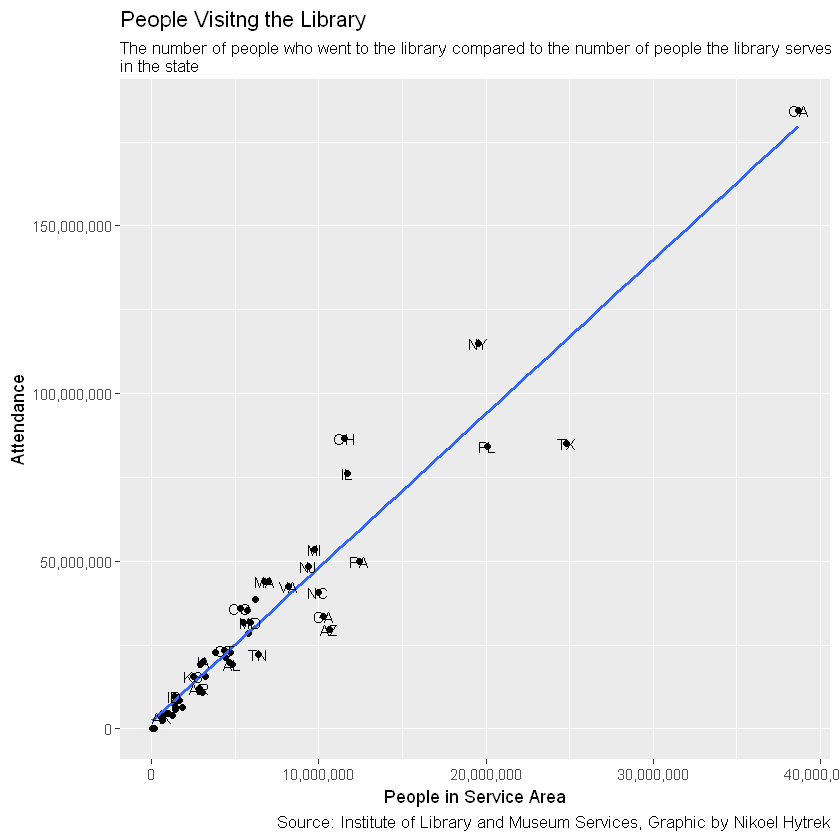

In [19]:
ggplot(smrecent, aes(x = SERVICE.AREA.POPULATION, y=attendance)) + geom_point() + 
geom_smooth(method=lm, se=FALSE) + scale_y_continuous(labels=comma) + scale_x_continuous(labels=comma) + 
geom_text(data=smrecent, aes(label=STATE), size=3.25, check_overlap = TRUE) + labs(x="People in Service Area", y="Attendance",
                                                                                  title="People Visitng the Library", subtitle="The number of people who went to the library compared to the number of people the library serves 
in the state",
                                                                                    caption="Source: Institute of Library and Museum Services, Graphic by Nikoel Hytrek")

In [20]:
ggsave("attend.pdf", width=7, height=7)

In [21]:
comp = recent %>%
select("USERS", "VISITS", "TOTAL.REVENUE", "STATE") %>%
mutate(attendance = (USERS + VISITS),)

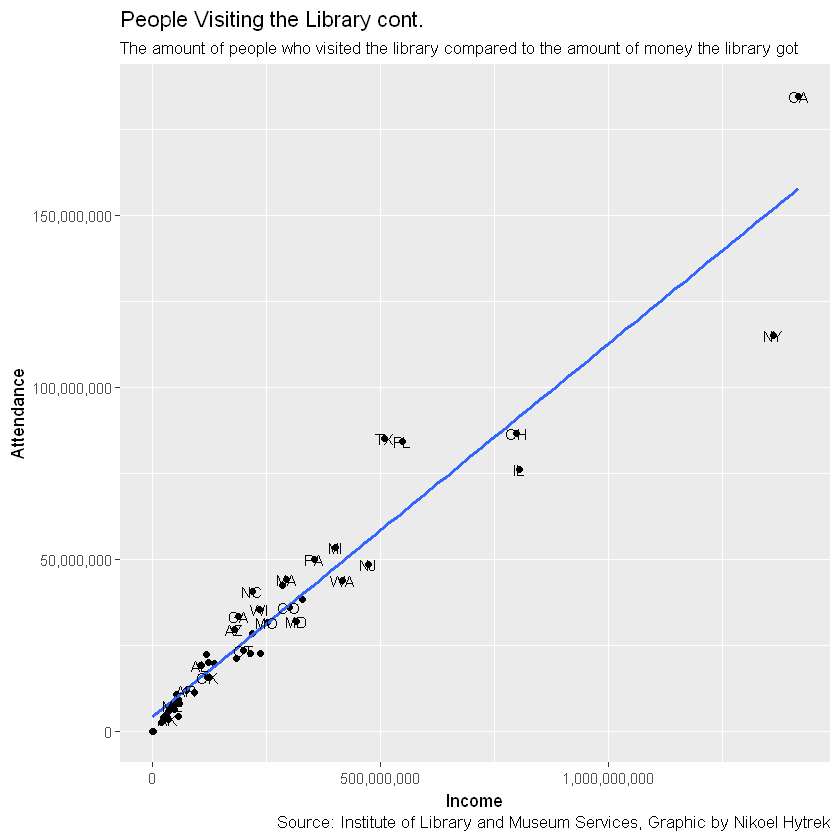

In [25]:
ggplot(comp, aes(x=TOTAL.REVENUE, y=attendance)) + geom_point() + 
geom_smooth(method=lm, se=FALSE) + scale_y_continuous(labels=comma) + scale_x_continuous(labels=comma) + 
geom_text(data=comp, aes(label=STATE), size=3.25, check_overlap = TRUE) + labs(x="Income", y="Attendance", title="People Visiting the Library cont.",
                                                                              subtitle="The amount of people who visited the library compared to the amount of money the library got",
                                                                              caption="Source: Institute of Library and Museum Services, Graphic by Nikoel Hytrek")

In [26]:
ggsave("key.pdf", width=7, height=7)

In [20]:
other = recent %>%
select("PRINT.MATERIALS", "EBOOKS", "AUDIO.MATERIALS", "VIDEO.MATERIALS", "TOTAL.PROGRAMS", "COMPUTER.USES", "USERS", 
       "VISITS", "STATE") %>%
mutate(attendance = (USERS + VISITS)) %>%
group_by(STATE)

head(other)

PRINT.MATERIALS,EBOOKS,AUDIO.MATERIALS,VIDEO.MATERIALS,TOTAL.PROGRAMS,COMPUTER.USES,USERS,VISITS,STATE,attendance
2395272,502695,129476,282054,12987,749206,350471,3120386,AK,3470857
9330807,3414634,430265,629212,44526,4277108,2680887,16529493,AL,19210380
6371116,591038,242426,459248,38333,1858903,1628139,10383499,AR,12011638
41938,1217,895,290,384,7118,13633,63563,AS,77196
8195813,1698298,632268,1047713,72501,7150328,3165690,26425068,AZ,29590758
63675919,5598601,3469511,5277598,362131,32275277,21917146,162526811,CA,184443957


In [21]:
printother = other %>%
summarize(print = sum(PRINT.MATERIALS), 
          attendance = sum(attendance))

head(printother)
         


STATE,print,attendance
AK,2395272,3470857
AL,9330807,19210380
AR,6371116,12011638
AS,41938,77196
AZ,8195813,29590758
CA,63675919,184443957


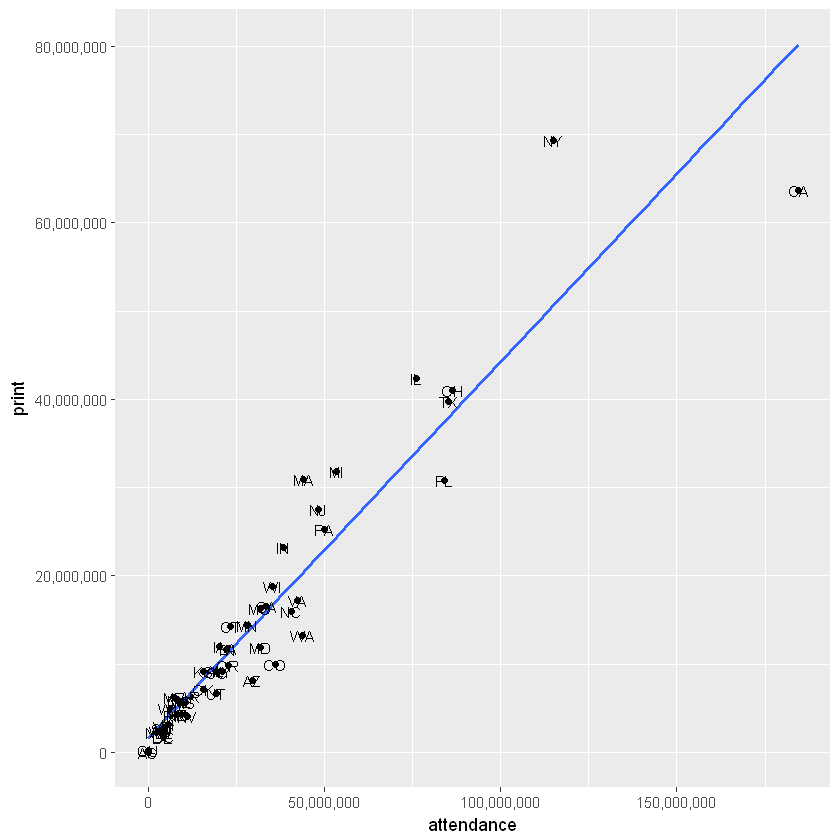

In [22]:
ggplot(printother, aes(x = attendance, y = print)) + geom_point() + geom_smooth(method=lm, se=FALSE) + 
scale_y_continuous(labels=comma) + scale_x_continuous(labels=comma) + geom_text(data=printother, aes(label=STATE), size=3.25)

In [23]:
ggsave("print_attend.pdf", width=7, height=7)

In [24]:
eother = other %>%
summarize(ebooks = sum(EBOOKS),
          attendance = sum(attendance))
head(eother)

STATE,ebooks,attendance
AK,502695,3470857
AL,3414634,19210380
AR,591038,12011638
AS,1217,77196
AZ,1698298,29590758
CA,5598601,184443957


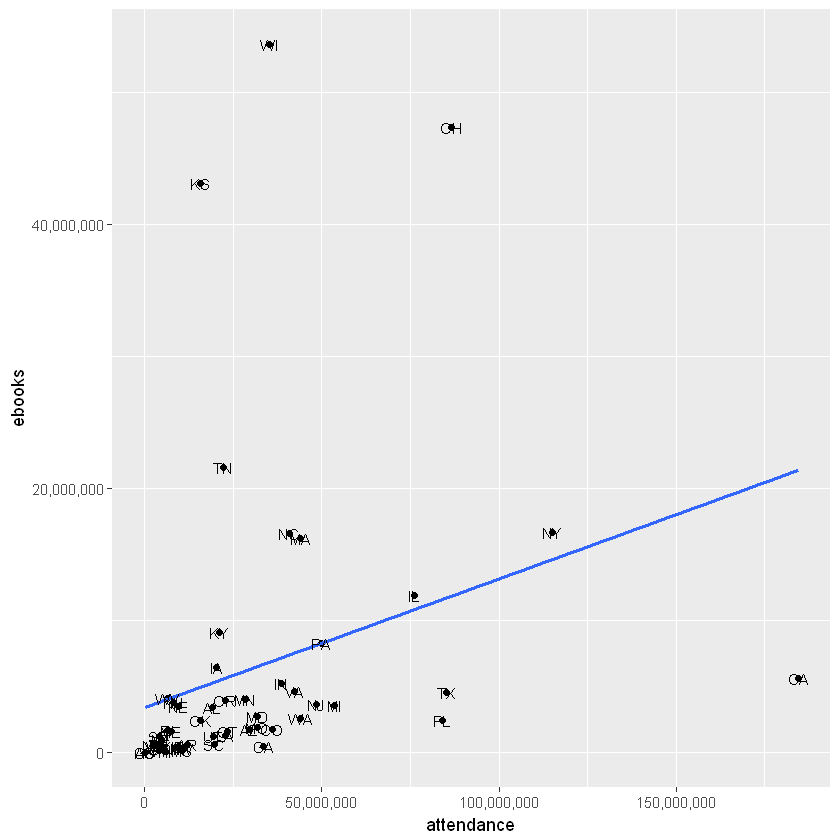

In [25]:
ggplot(eother, aes(x = attendance, y = ebooks)) + geom_point() + geom_smooth(method=lm, se=FALSE) + 
scale_y_continuous(labels=comma) + scale_x_continuous(labels=comma) + geom_text(data=eother, aes(label=STATE), size=3.25)

In [26]:
ggsave("elife_attend.pdf", width=7, height=7)

In [27]:
audother = other %>%
summarize(audio = sum(AUDIO.MATERIALS), 
          attendance = sum(attendance))
head(audother)

STATE,audio,attendance
AK,129476,3470857
AL,430265,19210380
AR,242426,12011638
AS,895,77196
AZ,632268,29590758
CA,3469511,184443957


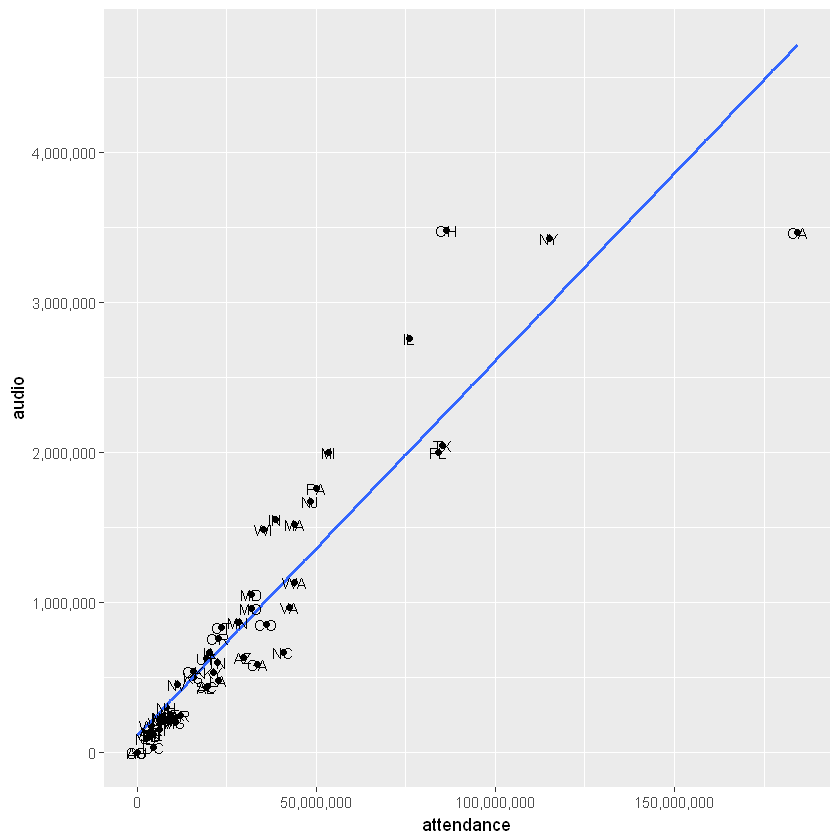

In [28]:
ggplot(audother, aes(x = attendance, y = audio)) + geom_point() + geom_smooth(method=lm, se=FALSE) + 
scale_y_continuous(labels=comma) + scale_x_continuous(labels=comma) + geom_text(data=audother, aes(label=STATE), size=3.25)

In [30]:
ggsave("audio_attend.pdf", width=7, height=7)

In [31]:
vidother = other %>%
summarize(video = sum(VIDEO.MATERIALS), 
          attendance = sum(attendance))

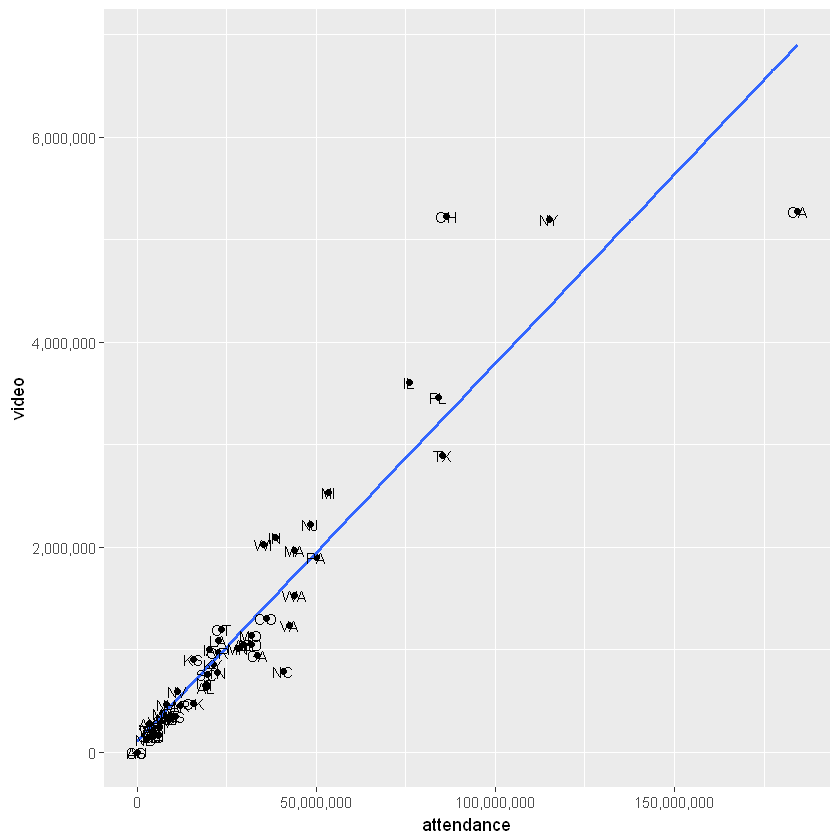

In [32]:
ggplot(vidother, aes(x = attendance, y = video)) + geom_point() + geom_smooth(method=lm, se=FALSE) + 
scale_y_continuous(labels=comma) + scale_x_continuous(labels=comma) + geom_text(data=vidother, aes(label=STATE), size=3.25)

In [33]:
ggsave("team_video.pdf", width=7, height=7)

In [34]:
pother = other %>%
summarize(prgrms = sum(TOTAL.PROGRAMS), 
          attendance = sum(attendance))

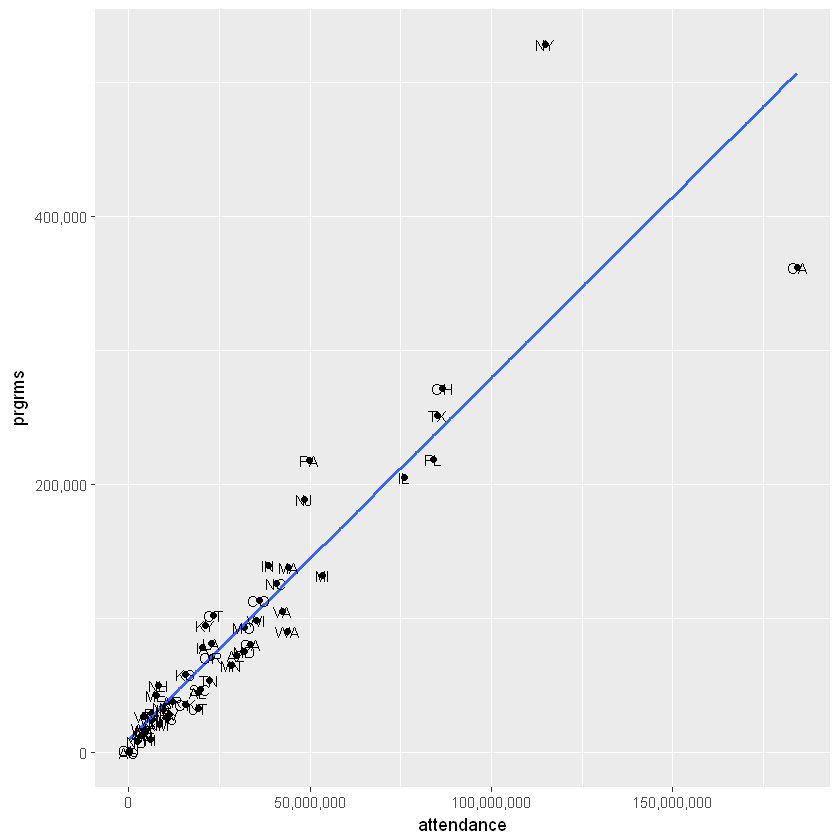

In [35]:
ggplot(pother, aes(x = attendance, y = prgrms)) + geom_point() + geom_smooth(method=lm, se=FALSE) + 
scale_y_continuous(labels=comma) + scale_x_continuous(labels=comma) + geom_text(data=pother, aes(label=STATE), size=3.25)

In [36]:
ggsave("activities_attend.pdf", width=7, height=7)

In [37]:
compother = other %>%
summarize(computers = sum(COMPUTER.USES),
          attendance = sum(attendance))

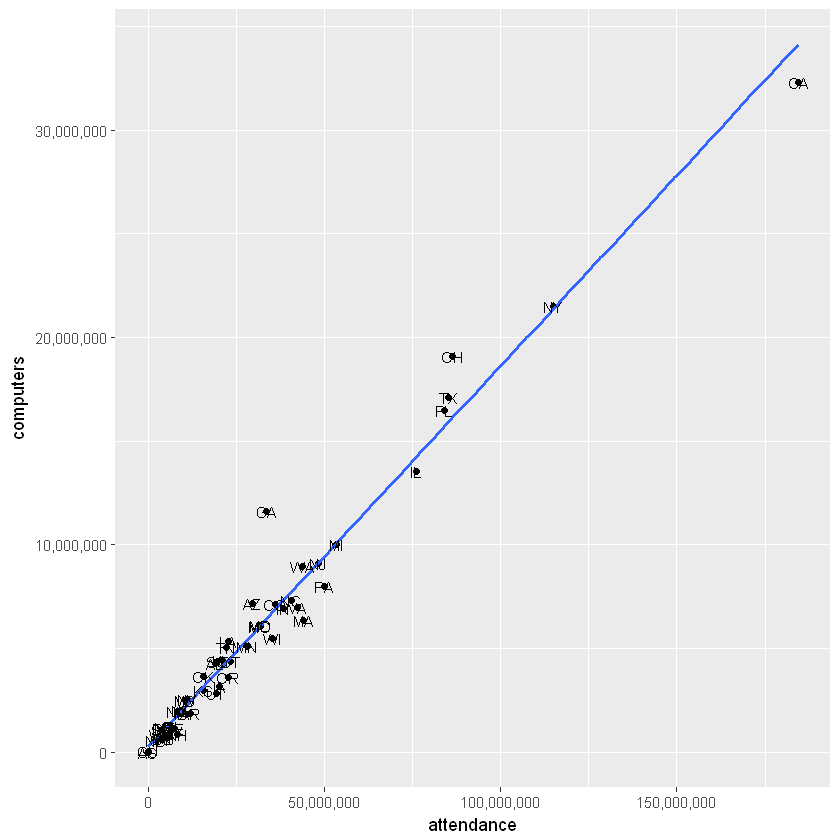

In [38]:
ggplot(compother, aes(x = attendance, y = computers)) + geom_point() + geom_smooth(method=lm, se=FALSE) + 
scale_y_continuous(labels=comma) + scale_x_continuous(labels=comma) + geom_text(data=compother, aes(label=STATE), size=3.25)

In [39]:
ggsave("info_highway_attend.pdf", width=7, height=7)